In [3]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [6]:
df=pd.read_csv("/home/ivan/Gitlab/iaea-pmt/data_Co60/20210713_185100/20210713_185100_0.csv", index_col=0)

In [7]:
df

TBP:68982  TBP:69034  TBP:68709  TBP:88222  TBP:65704  TBP:65964  \
0            138        137        136        137        136        137   
1            136        136        136        137        136        136   
2            137        136        137        137        137        137   
3            136        136        136        136        136        136   
4            137        137        137        137        137        136   
...          ...        ...        ...        ...        ...        ...   
65529        137        136        136        136        136        136   
65530        137        137        137        137        137        137   
65531        136        136        136        136        136        136   
65532        137        137        137        137        136        136   
65533        137        136        136        135        136        136   

       TBP:65582  TBP:67104  TBP:80184  TBP:84502  ...  TBP:66419  TBP:71609  \
0            135        137        137        137  ...        137        137   
1            136        136        136        136  ...        136        136   
2            137        137        137        137  ...        137        137   
3            136        136        136        136  ...        136        136   
4            135        137        137        136  ...        137        137   
...          ...        ...        ...        ...  ...        ...        ...   
65529        136        137        136        137  ...        136        136   
65530        137        137        137        137  ...        136        137   
65531        136        136        136        136  ...        136        136   
65532        137        137        136        136  ...        137        136   
65533        137        136        136        136  ...        137        137   

       TBP:92483  TBP:70339  TBP:68329  TBP:71975  TBP:75146  TBP:73617  \
0            137        137        137        137        130        137   
1            136        136        136        136        132        136   
2            136        137        137        137        134        137   
3            136        136        136        136        135        136   
4            137        137        136        137        135        136   
...          ...        ...        ...        ...        ...        ...   
65529        134        137        136        136        136        136   
65530        134        137        137        136        137        136   
65531        133        136        136        136        136        136   
65532        137        137        136        137        137        137   
65533        136        136        136        136        136        136   

       TBP:69388  TBP:76800  
0            137        137  
1            137        136  
2            138        136  
3            136        136  
4            137        137  
...          ...        ...  
65529        137        136  
65530        137        137  
65531        136        136  
65532        137        136  
65533        136        136  

[65534 rows x 4235 columns]

In [8]:
df2=df.iloc[:1500].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:68982  TBP:69034  TBP:68709  TBP:88222  TBP:65704  TBP:65964  \
0      0.998509   0.874499   0.647385   0.841598   0.527805   0.838558   
1      0.626717   0.639250   0.647385   0.841598   0.527805   0.658636   
2      0.812613   0.639250   0.850454   0.841598   0.705039   0.838558   
3      0.626717   0.639250   0.647385   0.627051   0.527805   0.658636   
4      0.812613   0.874499   0.850454   0.841598   0.705039   0.658636   
...         ...        ...        ...        ...        ...        ...   
1495   0.440821  -3.124734   0.647385   0.841598  -0.181134   0.658636   
1496   0.626717  -2.183738   0.647385   0.841598  -0.003899   0.838558   
1497   0.626717  -1.948489   0.647385   0.627051  -0.003899   0.478713   
1498   0.812613  -1.713240   0.850454   0.841598  -0.358368   0.838558   
1499   0.812613  -2.418987   0.647385   0.412503  -0.712838   0.658636   

      TBP:65582  TBP:67104  TBP:80184  TBP:84502  ...  TBP:66419  TBP:71609  \
0     -0.523242   0.796612   0.871095   0.771673  ...   0.812821   0.707616   
1      0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
2      0.785954   0.796612   0.871095   0.771673  ...   0.812821   0.707616   
3      0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
4     -0.523242   0.796612   0.871095   0.504412  ...   0.812821   0.707616   
...         ...        ...        ...        ...  ...        ...        ...   
1495   0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
1496   0.131356   0.582929   0.871095   0.771673  ...   0.812821   0.707616   
1497   0.131356   0.155562   0.693875   0.504412  ...   0.139956  -0.140844   
1498   0.785954   0.369245   0.871095   0.771673  ...   0.812821   0.707616   
1499   0.131356   0.155562   0.871095   0.504412  ...   0.139956  -0.140844   

      TBP:92483  TBP:70339  TBP:68329  TBP:71975  TBP:75146  TBP:73617  \
0      0.800947   0.756500   0.842385   0.829319  -4.108141   0.861834   
1      0.619134   0.516949   0.655022   0.724298  -2.685326   0.660878   
2      0.619134   0.756500   0.842385   0.829319  -1.262511   0.861834   
3      0.619134   0.516949   0.655022   0.724298  -0.551104   0.660878   
4      0.800947   0.756500   0.655022   0.829319  -0.551104   0.660878   
...         ...        ...        ...        ...        ...        ...   
1495   0.619134   0.516949   0.280295   0.724298   0.160304   0.861834   
1496   0.800947   0.516949  -0.094431   0.829319   0.871711   0.861834   
1497   0.255508   0.516949   0.092932   0.724298   0.160304   0.660878   
1498  -0.471744   0.756500   0.280295   0.829319   0.871711   0.861834   
1499  -0.835370   0.516949   0.280295   0.724298   0.871711   0.660878   

      TBP:69388  TBP:76800  
0      0.842357   0.699753  
1      0.842357   0.541485  
2      1.063216   0.541485  
3      0.621497   0.541485  
4      0.842357   0.699753  
...         ...        ...  
1495   0.621497   0.541485  
1496   0.842357   0.699753  
1497   0.621497   0.541485  
1498   0.842357   0.699753  
1499   0.621497   0.541485  

[1500 rows x 4235 columns]

<IPython.core.display.Javascript object>


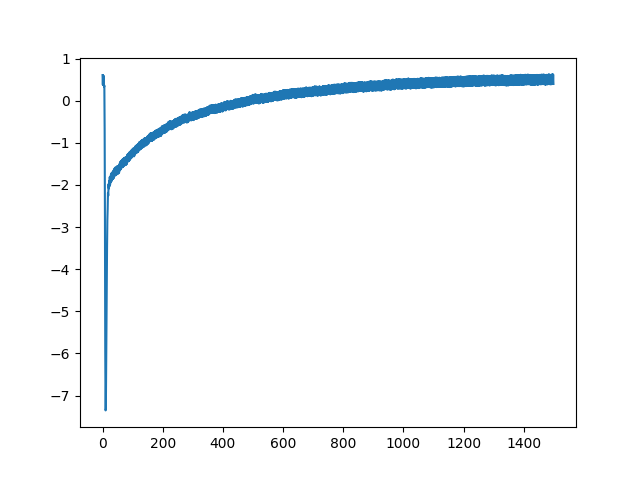

In [9]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

In [10]:
mod.to_csv("/home/ivan/Gitlab/iaea-pmt/FirCoefficients_Co60")

0       0.607975
1       0.377376
2       0.602164
3       0.373742
4       0.582749
          ...   
1495    0.403813
1496    0.622944
1497    0.403243
1498    0.621042
1499    0.397098
Length: 1500, dtype: float64

# FIR Integrated

In [6]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

<IPython.core.display.Javascript object>


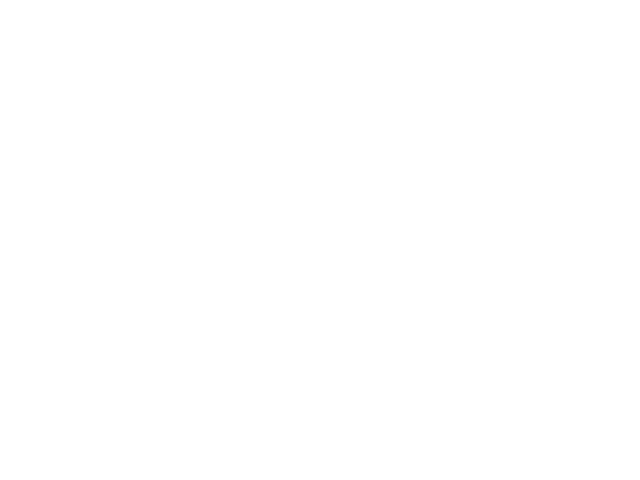

In [24]:
thr=1000
pkh=100000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
# sns.histplot(data=pkamp, kde=True)

<IPython.core.display.Javascript object>


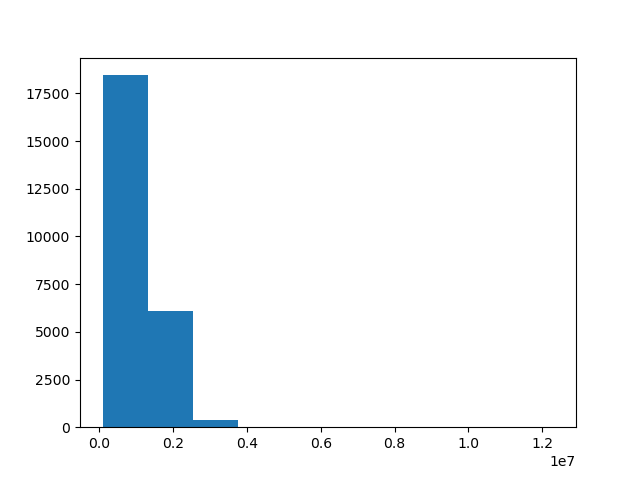

(array([1.8453e+04, 6.1140e+03, 3.6700e+02, 9.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   94602.73466909,  1315152.9958496 ,  2535703.2570301 ,
         3756253.51821061,  4976803.77939112,  6197354.04057162,
         7417904.30175213,  8638454.56293263,  9859004.82411314,
        11079555.08529365, 12300105.34647415]),
 <a list of 10 Patch objects>)

In [25]:
%matplotlib notebook
# sns.histplot(data=pkamp, kde=True)
plt.hist(pkamp)

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Integrated_Co60_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


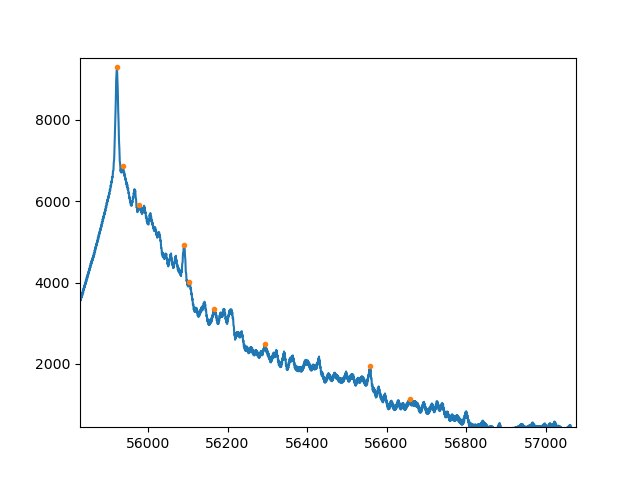

In [29]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:10]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
# plt.plot(x[10:])
# plt.plot(peak, x[10:][peak], ".")
# sns.histplot(data=pkamp, kde=True)

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Co60_mod3.csv")
df2

In [ ]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)

In [ ]:
%matplotlib notebook
data=max(x)-x
# plt.plot(data)
xpeak=pkdetect(data,10, 10)
plt.plot(x)
plt.plot(xpeak, x[xpeak],".")

In [ ]:
xpeak